In [230]:
# perusing through
import pandas as pd
import altair as alt
alt.data_transformers.enable('vegafusion')
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
# import pandas_profiling

file_name = "data/avocado.csv"

avocado_df = pd.read_csv(file_name)

avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [231]:
avocado_df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [232]:
#1. Drop columns E,F,G using python

# Drop columns 4046, 4225, and 4770
drop_EFG = ['Unnamed: 0', '4046', '4225', '4770']
avocado_data = avocado_df.drop(columns=drop_EFG)

avocado_data.head()

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [233]:
avocado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   Total Bags    18249 non-null  float64
 4   Small Bags    18249 non-null  float64
 5   Large Bags    18249 non-null  float64
 6   XLarge Bags   18249 non-null  float64
 7   type          18249 non-null  object 
 8   year          18249 non-null  int64  
 9   region        18249 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.4+ MB


In [234]:
avocado_data.describe()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [235]:
melted_data = pd.melt(avocado_data[['AveragePrice']])

In [236]:
# histogram for 'AveragePrice'
alt.Chart(melted_data).mark_bar().encode(
    alt.X('value:Q', bin=alt.Bin(maxbins=30), title='Average Price'),
    alt.Y('count()', title='Count'),
    color=alt.value('steelblue')
).properties(
    width=400,
    height=300,
    title='Distribution of Average Price'
)

alt.Chart(...)

In [237]:
alt.Chart(avocado_data).mark_bar().encode(
    alt.X('Total Volume:Q', bin=alt.Bin(maxbins=30), title='Total Volume'),
    alt.Y('count()', title='Count'),
    color=alt.value('orange')
).properties(
    width=400,
    height=300,
    title='Distribution of Total Volume'
)

alt.Chart(...)

In [238]:
alt.Chart(avocado_data).mark_bar().encode(
    alt.X('Total Bags:Q', bin=alt.Bin(maxbins=30), title='Total Bags'),
    alt.Y('count()', title='Count'),
    color=alt.value('green')
).properties(
    width=400,
    height=300,
    title='Distribution of Total Bags'
)

alt.Chart(...)

<Axes: >

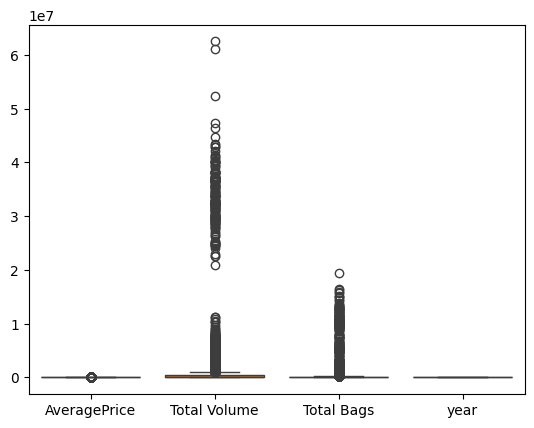

In [239]:
#Do anormalies detection. Find the abnormal columns and the ones with the most abnormalities

# Selecting relevant columns for analysis
features_of_interest = ['AveragePrice', 'Total Volume', 'Total Bags', 'year', ]
clean_data = avocado_data[features_of_interest].copy()

# Visualizing distribution using boxplot
sns.boxplot(data=clean_data)

In [240]:

# Fitting Isolation Forest model
random_state = np.random.RandomState(42)
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.2), random_state=random_state)
model.fit(clean_data)

# Getting anomaly predictions
clean_data['anomaly_score'] = model.predict(clean_data)

anomalies = clean_data[clean_data['anomaly_score'] == -1]

# Sum
total_them_up = anomalies[features_of_interest].sum()

sort = total_them_up.sort_values(ascending=False)

#  result
print("Columns with the Most Anomalies:")
print(sort)

Columns with the Most Anomalies:
Total Volume    1.300793e+10
Total Bags      3.627835e+09
year            7.360515e+06
AveragePrice    4.628140e+03
dtype: float64


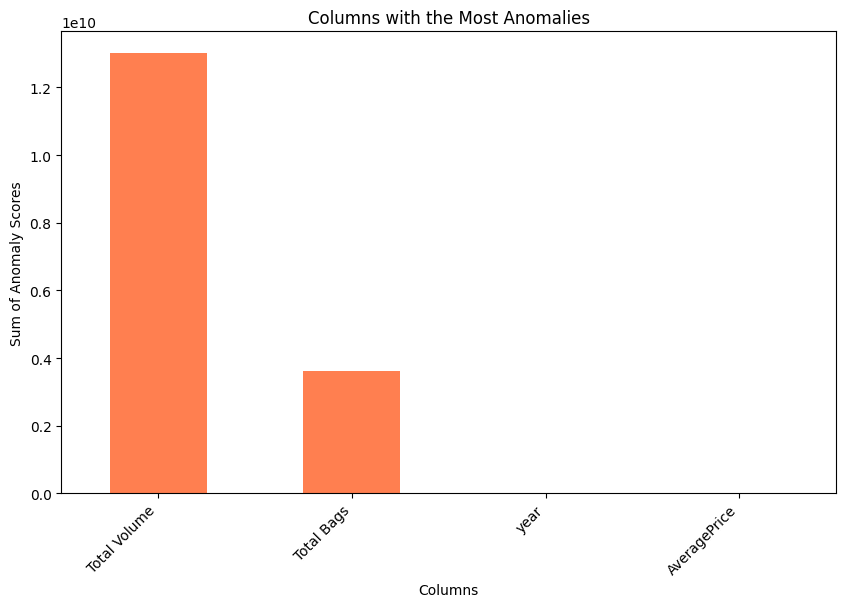

In [241]:
# Plot the result
plt.figure(figsize=(10, 6))
sort.plot(kind='bar', color='coral')
plt.title('Columns with the Most Anomalies')
plt.xlabel('Columns')
plt.ylabel('Sum of Anomaly Scores')
plt.xticks(rotation=45, ha='right')
plt.show()

In [242]:
# Find the year with the least bags
year_least_bags = avocado_data.groupby('year')['Total Bags'].sum().idxmin()

# Find the state with the least bags
state_least_bags = avocado_data.groupby('region')['Total Bags'].sum().idxmin()

# Find the state with the highest bags of avocado
state_highest_bags = avocado_data.groupby('region')['Total Bags'].sum().idxmax()

# Find the state with the highest price of avocado
state_highest_price = avocado_data.groupby('region')['AveragePrice'].mean().idxmax()

# Find the state that consumes the most avocado
state_most_consumption = avocado_data.groupby('region')['Total Volume'].sum().idxmax()

print(f"Year with the least bags: {year_least_bags}")
print(f"State with the least bags: {state_least_bags}")
print(f"State with the highest bags of avocado: {state_highest_bags}")
print(f"State with the highest price of avocado: {state_highest_price}")
print(f"State that consumes the most avocado: {state_most_consumption}")


Year with the least bags: 2018
State with the least bags: Albany
State with the highest bags of avocado: TotalUS
State with the highest price of avocado: HartfordSpringfield
State that consumes the most avocado: TotalUS


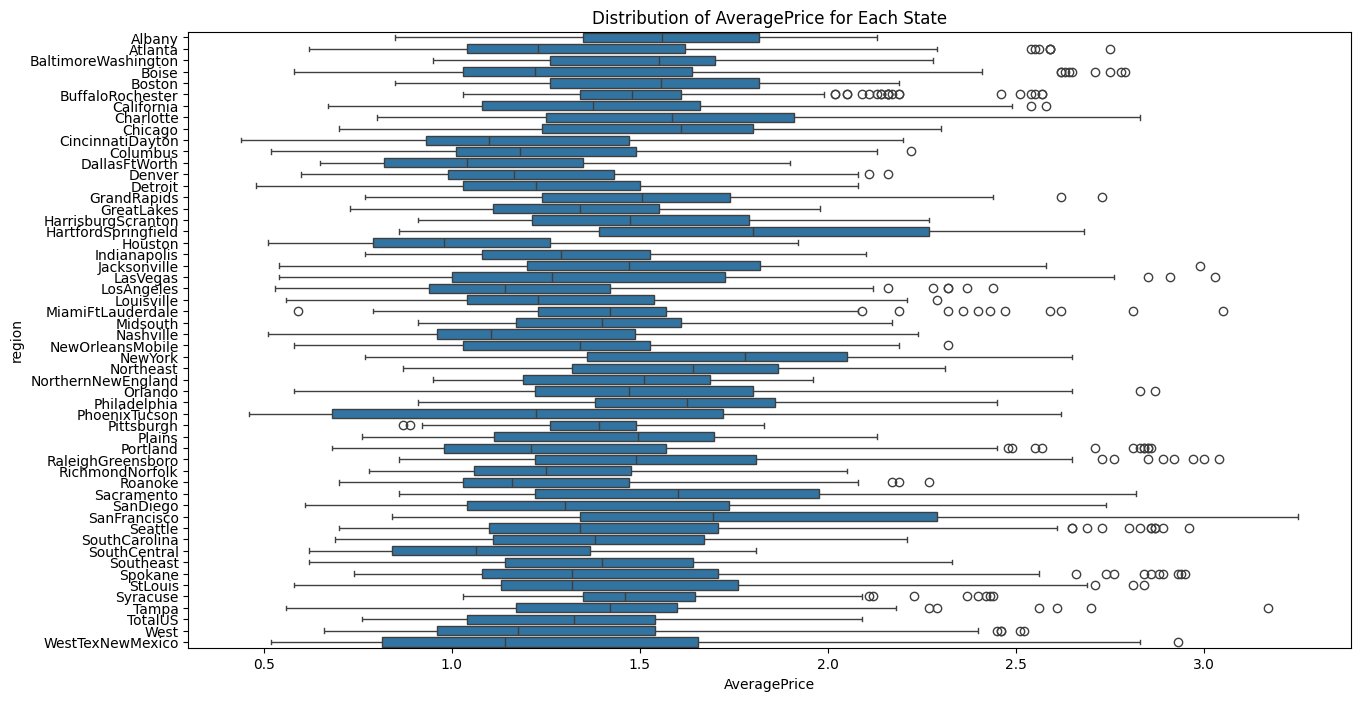

In [243]:
# Finding 1: Visualize the distribution of 'AveragePrice' for each state
plt.figure(figsize=(15, 8))
sns.boxplot(x='AveragePrice', y='region', data=avocado_data)
plt.title('Distribution of AveragePrice for Each State')
plt.show()


In [244]:
# Display the data types of each column in the dataset
data_types = avocado_data.dtypes

# Count the unique data types
num_data_types = data_types.nunique()

# Print the unique data types and the count
print("Number of unique data types:", num_data_types)
print("Unique data types:", data_types.unique())


Number of unique data types: 3
Unique data types: [dtype('O') dtype('float64') dtype('int64')]


In [245]:
for column in features_of_interest:
  clean_data[column+'_anomaly'] = (clean_data['anomaly_score'] == -1)
  # Displaying rows with anomalies
  inlier = clean_data[column + '_anomaly']
  outlier = (clean_data['anomaly_score'] == -1)

  conf_matrix = confusion_matrix(inlier, outlier)
  classification_rep = classification_report(inlier, outlier)
  
  print(f"\nFeature: {column}")
  print("\nClassification Report:\n", classification_rep)
  print("Confusion Matrix:\n", conf_matrix)


Feature: AveragePrice

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     14599
        True       1.00      1.00      1.00      3650

    accuracy                           1.00     18249
   macro avg       1.00      1.00      1.00     18249
weighted avg       1.00      1.00      1.00     18249

Confusion Matrix:
 [[14599     0]
 [    0  3650]]

Feature: Total Volume

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     14599
        True       1.00      1.00      1.00      3650

    accuracy                           1.00     18249
   macro avg       1.00      1.00      1.00     18249
weighted avg       1.00      1.00      1.00     18249

Confusion Matrix:
 [[14599     0]
 [    0  3650]]

Feature: Total Bags

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     1

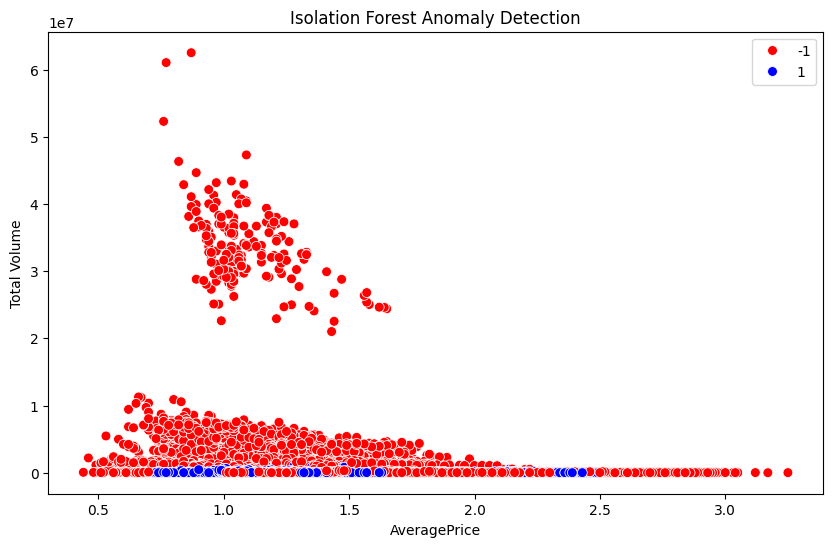

In [246]:
# Visualize anomalies using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AveragePrice', y='Total Volume', data=clean_data, hue=clean_data['anomaly_score'], palette={1: 'blue', -1: 'red'}, s=50)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('AveragePrice')
plt.ylabel('Total Volume')
plt.legend(loc='upper right')
plt.show()

In [247]:
sorted_avocado_data = avocado_data.sort_values("Date")
sorted_avocado_data

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,2018-03-25,0.70,9010588.32,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,2018-03-25,1.42,163496.70,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,2018-03-25,1.70,190257.38,89631.19,89424.11,207.08,0.00,organic,2018,California


In [248]:
# Date + AveragePrice plot
alt.Chart(avocado_data).mark_line(point=True).encode(
    x='Date:T',
    y='AveragePrice:Q',
    tooltip=['Date:T', 'AveragePrice:Q']
).properties(
    width=600,  
    height=400,  
    title='Avocado Prices Over Time'  
).configure_axis(
    labelAngle=45  # 
).configure_point(
    size=50  # customizeable
)

alt.Chart(...)

In [249]:
alt.Chart(avocado_data).mark_bar().encode(
    x=alt.X('region:N', title='Region'),  # Encoding 'region' on the x-axis
    y=alt.Y('count():Q', title='Number of Regions'),  # Counting the number of occurrences for each region
    tooltip=['region:N', 'count():Q']  # Adding tooltips for better interactivity
).properties(
    width=600,  # Adjusted width for better proportions
    height=400,  # Adjusted height for better proportions
    title='Number of Regions'  # Added a title
).configure_axis(
    labelAngle=45  # Rotated x-axis labels for better readability
)

alt.Chart(...)

In [250]:
# Altair bar chart
alt.Chart(avocado_df).mark_bar().encode(
    x=alt.X('year:N', title='Year'),  
    y=alt.Y('count():Q', title='Count'), 
    tooltip=['year:N', 'count():Q'] 
).properties(
    width=600,  
    height=400,  
    title='Count of Avocado Data by Year'  
).configure_axis(
    labelAngle=45  
)

alt.Chart(...)

In [251]:
prophet_data = sorted_avocado_data[['Date', 'AveragePrice']]
prophet_data

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [252]:
timeseries_data = prophet_data.rename(columns={'Date':'ds', 'AveragePrice':'y'})

timeseries_data

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [253]:
m = Prophet()
m.fit(timeseries_data)

19:58:34 - cmdstanpy - INFO - Chain [1] start processing
19:58:40 - cmdstanpy - INFO - Chain [1] done processing


In [254]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [255]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.494850,0.881013,1.850213,1.494850,1.494850,-0.113063,-0.113063,-0.113063,-0.113063,-0.113063,-0.113063,0.0,0.0,0.0,1.381788
1,2015-01-11,1.490022,0.886419,1.890657,1.490022,1.490022,-0.104425,-0.104425,-0.104425,-0.104425,-0.104425,-0.104425,0.0,0.0,0.0,1.385597
2,2015-01-18,1.485193,0.888263,1.871154,1.485193,1.485193,-0.104132,-0.104132,-0.104132,-0.104132,-0.104132,-0.104132,0.0,0.0,0.0,1.381062
3,2015-01-25,1.480365,0.852287,1.858568,1.480365,1.480365,-0.123261,-0.123261,-0.123261,-0.123261,-0.123261,-0.123261,0.0,0.0,0.0,1.357104
4,2015-02-01,1.475536,0.823866,1.826661,1.475536,1.475536,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,-0.151785,0.0,0.0,0.0,1.323751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.168726,0.576863,1.620718,0.982278,1.341807,-0.086512,-0.086512,-0.086512,-0.086512,-0.086512,-0.086512,0.0,0.0,0.0,1.082214
530,2019-03-22,1.168010,0.526860,1.625293,0.980835,1.341891,-0.084828,-0.084828,-0.084828,-0.084828,-0.084828,-0.084828,0.0,0.0,0.0,1.083182
531,2019-03-23,1.167293,0.592358,1.611025,0.979391,1.342068,-0.082869,-0.082869,-0.082869,-0.082869,-0.082869,-0.082869,0.0,0.0,0.0,1.084424
532,2019-03-24,1.166577,0.549772,1.626428,0.977947,1.342651,-0.080655,-0.080655,-0.080655,-0.080655,-0.080655,-0.080655,0.0,0.0,0.0,1.085922


Text(0.5, 1.0, 'Forecasted Price')

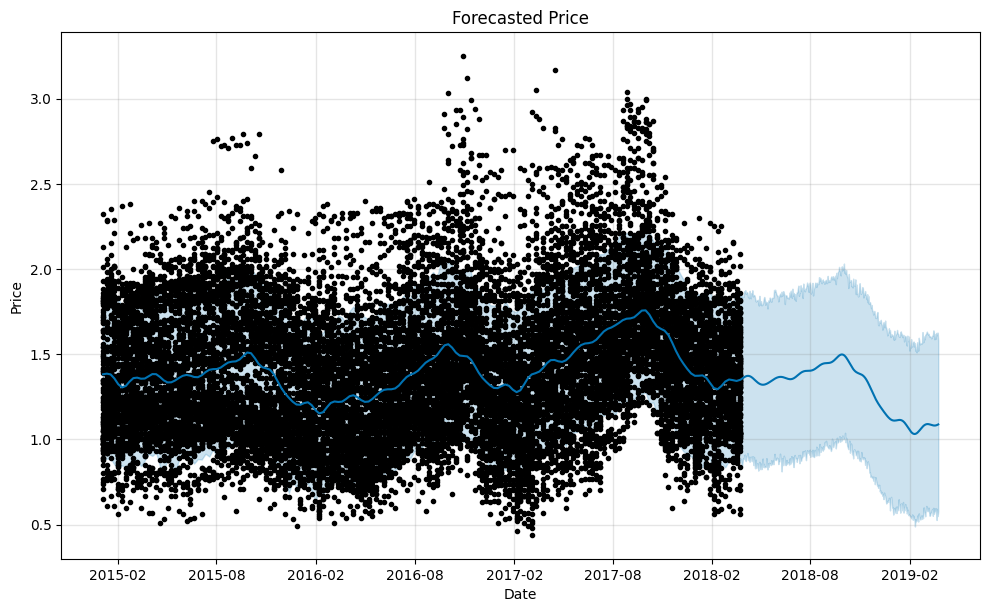

In [257]:
figure = m.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Forecasted Price')

In [ ]:
from prophet.diagnostics import performance_metrics, cross_validation

In [258]:
# evaluate
from prophet.diagnostics import performance_metrics, cross_validation

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p.head())  # Display key evaluation metrics

  0%|          | 0/1 [00:00<?, ?it/s]20:01:39 - cmdstanpy - INFO - Chain [1] start processing
20:01:43 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [02:45<00:00, 165.40s/it]


  horizon       mse      rmse       mae      mape     mdape     smape  \
0 36 days  0.221449  0.470584  0.359808  0.233220  0.207712  0.244165   
1 43 days  0.235117  0.484888  0.372502  0.237850  0.215630  0.252014   
2 50 days  0.246781  0.496770  0.384699  0.242623  0.216171  0.259365   
3 57 days  0.249369  0.499368  0.388756  0.242237  0.219850  0.260758   
4 64 days  0.247328  0.497321  0.386996  0.238603  0.220818  0.257716   

   coverage  
0  0.729021  
1  0.732517  
2  0.715359  
3  0.707330  
4  0.710697  


ARIMA PREDICTIONS

In [212]:
# Assuming you have the avocado data in a DataFrame named 'avocado_data'
# Make sure the 'Date' column is in datetime format and set it as the index
sorted_avocado_data['Date'] = pd.to_datetime(sorted_avocado_data['Date'])
sorted_avocado_data = sorted_avocado_data.set_index('Date')

# Extracting the average prices for simplicity
price_data = sorted_avocado_data.groupby('Date')['AveragePrice'].mean()

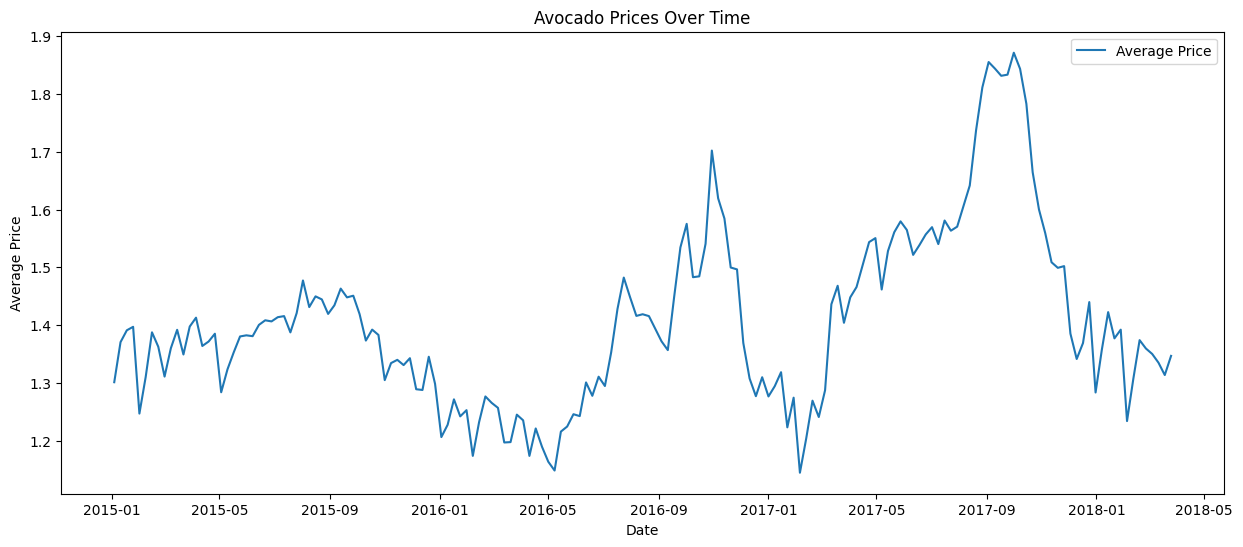

In [213]:
# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(price_data, label='Average Price')
plt.title('Avocado Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

In [ ]:
# with mean NOT STATIONARY

# result = adfuller(price_data)
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])
# print('Critical Values:', result[4])


In [217]:
# Check for stationarity using Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(price_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -2.357816524766646
p-value: 0.15399792321893585
Critical Values: {'1%': -3.4698858990744115, '5%': -2.8789026251889647, '10%': -2.5760266680839004}


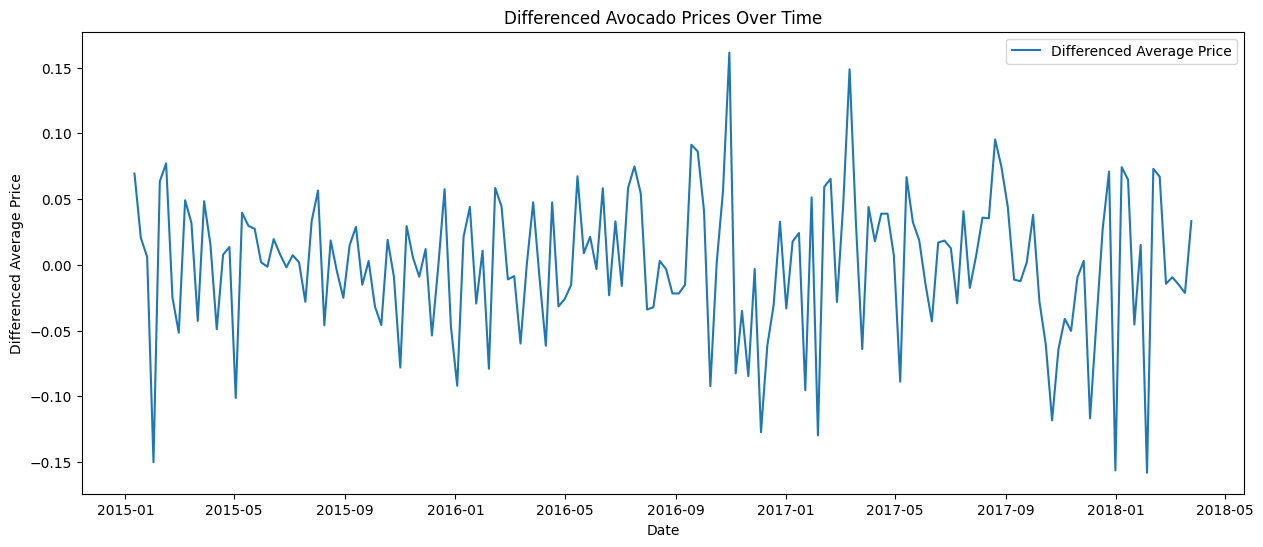


ADF Statistic (Differenced): -13.199464270995628
p-value (Differenced): 1.1020064201645784e-24
Critical Values (Differenced): {'1%': -3.470126426071447, '5%': -2.8790075987120027, '10%': -2.5760826967621644}


In [218]:
# If the p-value is less than 0.05, the series is stationary; otherwise, perform differencing
if result[1] > 0.05:
  # Differencing to make the series stationary
  price_data_diff = price_data.diff().dropna()

  # Plot differenced time series data
  plt.figure(figsize=(15, 6))
  plt.plot(price_data_diff, label='Differenced Average Price')
  plt.title('Differenced Avocado Prices Over Time')
  plt.xlabel('Date')
  plt.ylabel('Differenced Average Price')
  plt.legend()
  plt.show()

  # Perform the Dickey-Fuller test again on differenced data
  result_diff = adfuller(price_data_diff)
  print('\nADF Statistic (Differenced):', result_diff[0])
  print('p-value (Differenced):', result_diff[1])
  print('Critical Values (Differenced):', result_diff[4])


In [219]:
# Split the data into training and testing sets
train_size = int(len(price_data) * 0.8)
train, test = price_data[:train_size], price_data[train_size:]

In [224]:
# Build ARIMA model
order = (1, 1, 1)  # Example order; you may need to tune this
model = ARIMA(train, order=order, freq='W')
fit_model = model.fit()

c:\Users\send2\OneDrive\Documents\data_science_projects\ai_ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



In [226]:
# Make predictions
predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1)

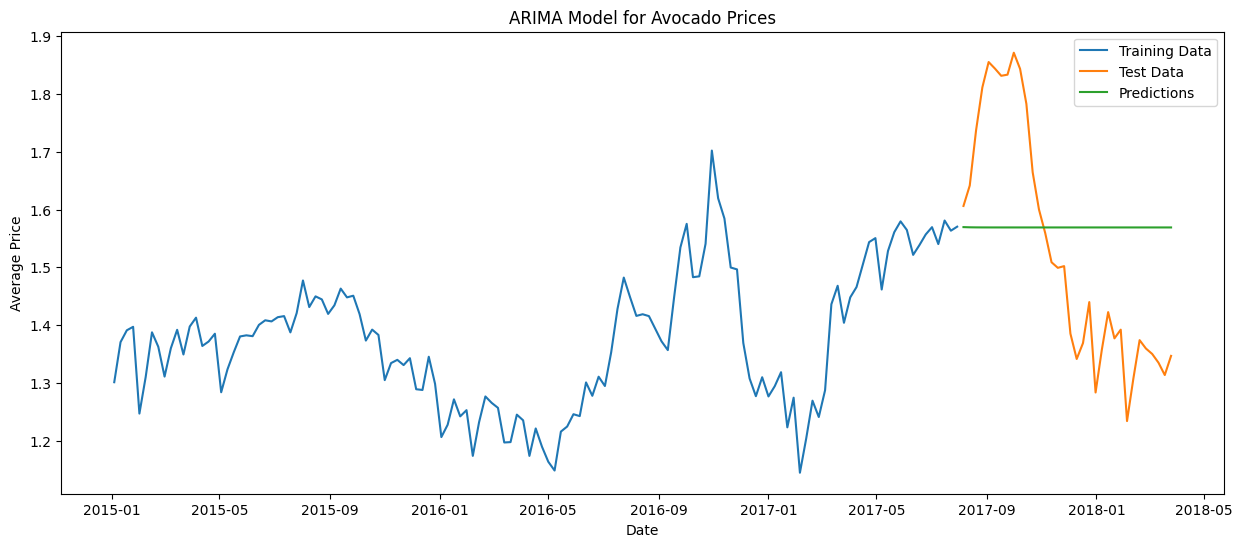

In [227]:
# Plot predictions against actual values
plt.figure(figsize=(15, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(predictions, label='Predictions')
plt.title('ARIMA Model for Avocado Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

In [229]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - predictions) / test)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 0.18865866560259484
Mean Squared Error (MSE): 0.04302087545065351
Root Mean Squared Error (RMSE): 0.20741474260682027
Mean Absolute Percentage Error (MAPE): 12.594580300523248%
